***Standarization*** *: Standardization is a feature scaling technique that transforms numerical features to have zero mean (0) and unit variance or Std. Deviation (1). It ensures that all features contribute equally to a model, preventing dominance by larger numerical values.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../files/Social_Network_Ads.csv')

In [3]:
data= data.iloc[:, 2:]

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


*Train-Test Split*

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("Purchased", axis=1),
    data["Purchased"],
    test_size=0.2,
    random_state=0,
)

# here features X are the columns except 'Purchsed' and label y is 'Purchased'

In [6]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

*Standard Scalar*

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# here X_train_scaled and X_test_scaled are not dataframes, they are numpy arrays

In [8]:
# numpy array to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# checking
np.round(X_train_scaled.describe()) 

# SD = 1, Mean = 0

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


**Effect of Scaling**

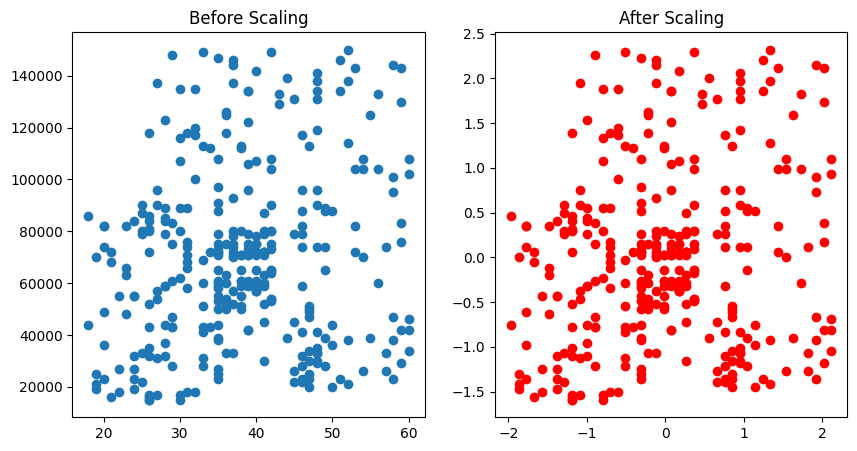

In [10]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
)

ax1.set_title("Before Scaling")
ax1.scatter(x=X_train["Age"], y=X_train["EstimatedSalary"])
ax2.set_title("After Scaling")
ax2.scatter(x=X_train_scaled["Age"], y=X_train_scaled["EstimatedSalary"], color="red")


plt.show()

**Why Scaling?**

*We will know the importance of scaling by comparing the prediction of scaled data and non-scaled data*

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr_scaled = LogisticRegression()
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

*Checking the accuracy*

In [15]:
from sklearn.metrics import accuracy_score


In [16]:
acc = accuracy_score(y_test, y_pred)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [17]:
print(f"Accuracy without Scaling:{acc}")
print(f"Accuracy with Scaling:{acc_scaled}")

Accuracy without Scaling:0.9125
Accuracy with Scaling:0.925


**Scaling does not always guarantee higher accuracy, but it often improves performance for certain models that rely on numerical magnitudes.**